In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import argparse

In [2]:
dfStarClassification = pd.read_csv("/Users/KDolp/Desktop/Физтех/Data Analysis/Lab2/Stars.csv",sep=",")
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['Blue White','Blue white','Blue-white'],'Blue-White')
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['yellow-white','White-Yellow'],'Yellowish White')
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['yellowish'],'Yellowish')
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['Whitish','white'],'White')

In [3]:
dict_type = {'0':'Red Dwarf','1': 'Brown Dwarf','2': 'White Dwarf','3': 'Main Sequence','4': 'Supergiants','5': 'Hypergiants'}
dfStarClassification['Type'] = dfStarClassification['Type'].replace(dict_type.keys(),dict_type.values())

In [4]:
dfStarClassification_enc = pd.get_dummies(data=dfStarClassification.drop('Type',axis=1), columns=['Color','Spectral_Class'],drop_first= True)

In [5]:
dfStarClassification_enc.shape

(240, 18)

In [6]:
x = dfStarClassification_enc
y = pd.DataFrame(dfStarClassification['Type'],columns=['Type'])

In [7]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.1)

In [8]:
mm = MinMaxScaler()
xTrain_mm = pd.DataFrame(mm.fit_transform(xTrain),columns=['Temperature', 'L', 'R', 'A_M', 'Color_Blue-White', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_Yellowish', 'Color_Yellowish White',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O'])
xTest_mm = pd.DataFrame(mm.transform(xTest),columns=['Temperature', 'L', 'R', 'A_M', 'Color_Blue-White', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_Yellowish', 'Color_Yellowish White',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O'])

In [9]:
yTrain = pd.get_dummies(data=yTrain,columns =['Type'])
yTest = pd.get_dummies(data=yTest,columns =['Type'])

In [10]:
model_nn = keras.Sequential([keras.layers.Dense(700,kernel_initializer = 'he_uniform',input_shape=(18,),activation = 'relu'),
                            keras.layers.Dense(800,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(900,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(6,kernel_initializer = 'glorot_uniform',activation = 'softmax'),
                            ])
model_nn.compile(loss = "categorical_crossentropy",metrics = ['accuracy'],optimizer = 'sgd')
history = model_nn.fit(xTrain_mm,yTrain,validation_data = (xTest_mm,yTest),epochs = 40)

Epoch 1/40
7/7 [==============================] - 1s 63ms/step - loss: 1.5249 - accuracy: 0.3889 - val_loss: 1.3393 - val_accuracy: 0.5417
Epoch 2/40
7/7 [==============================] - 0s 23ms/step - loss: 1.1777 - accuracy: 0.7176 - val_loss: 1.0697 - val_accuracy: 0.7917
Epoch 3/40
7/7 [==============================] - 0s 20ms/step - loss: 1.0039 - accuracy: 0.6667 - val_loss: 0.9232 - val_accuracy: 0.7500
Epoch 4/40
7/7 [==============================] - 0s 14ms/step - loss: 0.8791 - accuracy: 0.7407 - val_loss: 0.8673 - val_accuracy: 0.5833
Epoch 5/40
7/7 [==============================] - 0s 14ms/step - loss: 0.7859 - accuracy: 0.7593 - val_loss: 0.7519 - val_accuracy: 0.8750
Epoch 6/40
7/7 [==============================] - 0s 14ms/step - loss: 0.7158 - accuracy: 0.7731 - val_loss: 0.7266 - val_accuracy: 0.6250
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.6753 - accuracy: 0.7546 - val_loss: 0.6978 - val_accuracy: 0.6250
Epoch 8/40
7/7 [===========

In [11]:
test_loss,test_acc= model_nn.evaluate(xTest_mm,yTest)
print("test_accuracy:",test_acc)

1/1 [==============================] - 0s 49ms/step - loss: 0.2776 - accuracy: 0.9167
test_accuracy: 0.9166666865348816


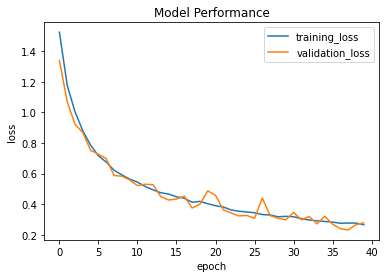

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()